In [47]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [48]:
#import data, FTHG goals scored by home team, FTAG goals scored by away team
df = pd.read_csv("Bundesliga_Results.csv")
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,D1,7/8/1993,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,D1,7/8/1993,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,D1,7/8/1993,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,D1,7/8/1993,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,D1,7/8/1993,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94


In [49]:
#delete unneeded columns
df = df[["Date","HomeTeam","AwayTeam","FTHG","FTAG","Season"]]
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,Season
0,7/8/1993,Bayern Munich,Freiburg,3,1,1993-94
1,7/8/1993,Dortmund,Karlsruhe,2,1,1993-94
2,7/8/1993,Duisburg,Leverkusen,2,2,1993-94
3,7/8/1993,FC Koln,Kaiserslautern,0,2,1993-94
4,7/8/1993,Hamburg,Nurnberg,5,2,1993-94


In [50]:
#create column for goal difference and winner
df["goal_dif"] = df["FTHG"] - df["FTAG"]
df["winner"] = df["goal_dif"].apply(lambda x : "home" if x>0 else "tie" if x==0 else "away")
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,Season,goal_dif,winner
0,7/8/1993,Bayern Munich,Freiburg,3,1,1993-94,2,home
1,7/8/1993,Dortmund,Karlsruhe,2,1,1993-94,1,home
2,7/8/1993,Duisburg,Leverkusen,2,2,1993-94,0,tie
3,7/8/1993,FC Koln,Kaiserslautern,0,2,1993-94,-2,away
4,7/8/1993,Hamburg,Nurnberg,5,2,1993-94,3,home
...,...,...,...,...,...,...,...,...
7645,12/5/2018,Hoffenheim,Dortmund,3,1,2017-18,2,home
7646,12/5/2018,Leverkusen,Hannover,3,2,2017-18,1,home
7647,12/5/2018,Mainz,Werder Bremen,1,2,2017-18,-1,away
7648,12/5/2018,Schalke 04,Ein Frankfurt,1,0,2017-18,1,home


Winrate according to the corresponding team
home    0.468889
away    0.274379
tie     0.256732
Name: winner, dtype: float64


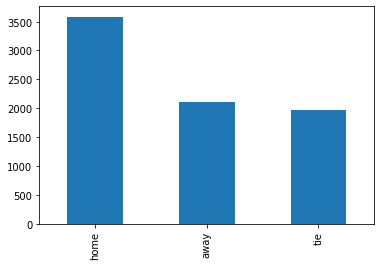

In [51]:
#plot results regarding rather home or away won more often in all seasons combined
df['winner'].value_counts().plot(kind="bar")
print("Winrate according to the corresponding team")
print(df['winner'].value_counts()/len(df.index))


In [52]:
#check winrates for every unique team
winrates_home = {}
winrates_away = {}
tie_home = {}
tie_away = {}
loserate_home = {}
loserate_away = {}
for team in df['HomeTeam'].unique():
    home_df = df[df['HomeTeam'] == team]
    away_df = df[df["AwayTeam"] == team] 
    if "home" in home_df['winner'].value_counts():
        winrates_home[team] = home_df['winner'].value_counts()['home']/len(home_df.index) 
    if "away" in away_df['winner'].value_counts():
        winrates_away[team] = away_df['winner'].value_counts()['away']/len(away_df.index)
    if "tie" in home_df['winner'].value_counts():
        tie_home[team] = home_df['winner'].value_counts()['tie']/len(home_df.index) 
    if "tie" in away_df['winner'].value_counts():
        tie_away[team] = away_df['winner'].value_counts()['tie']/len(away_df.index) 
    if "away" in home_df['winner'].value_counts():
        loserate_home[team] = home_df['winner'].value_counts()['away']/len(home_df.index) 
    if "away" in away_df['winner'].value_counts():
        loserate_away[team] = away_df['winner'].value_counts()['away']/len(away_df.index) 



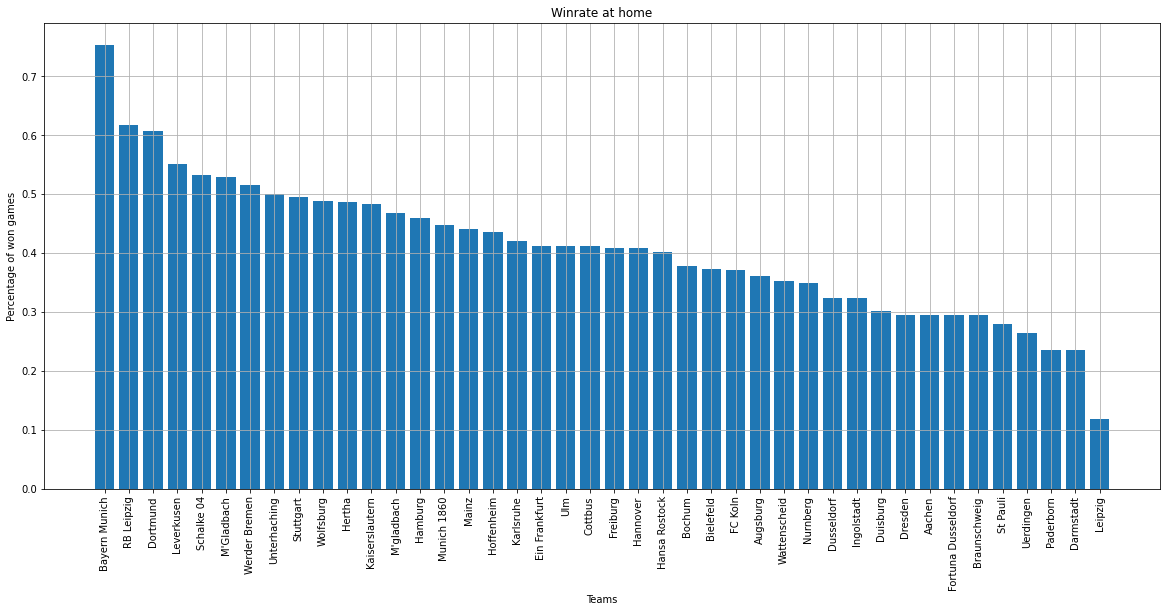

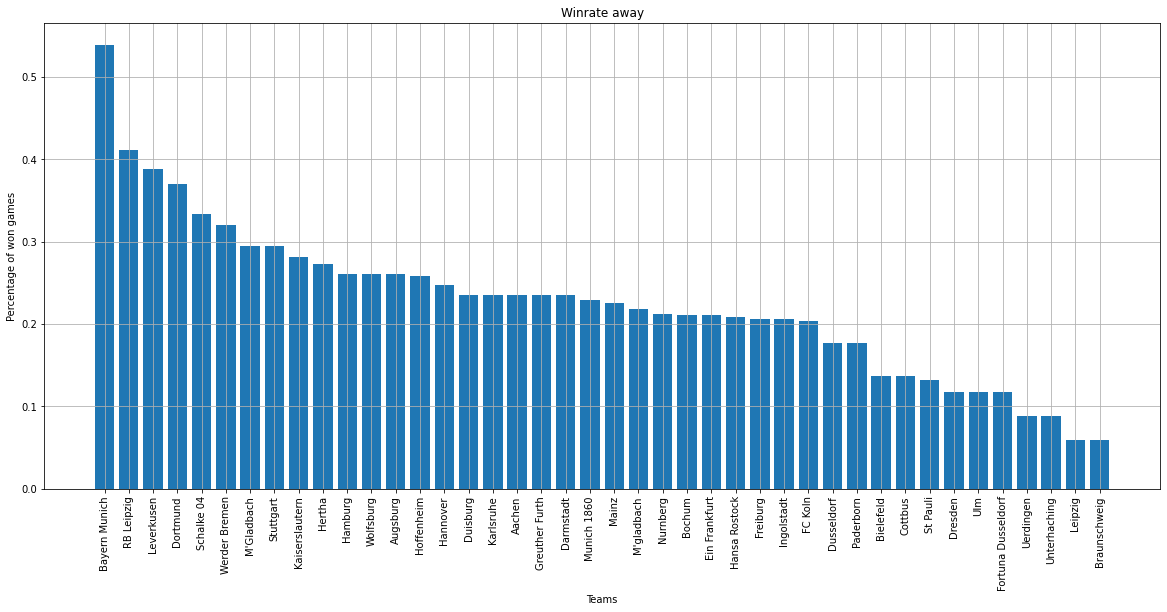

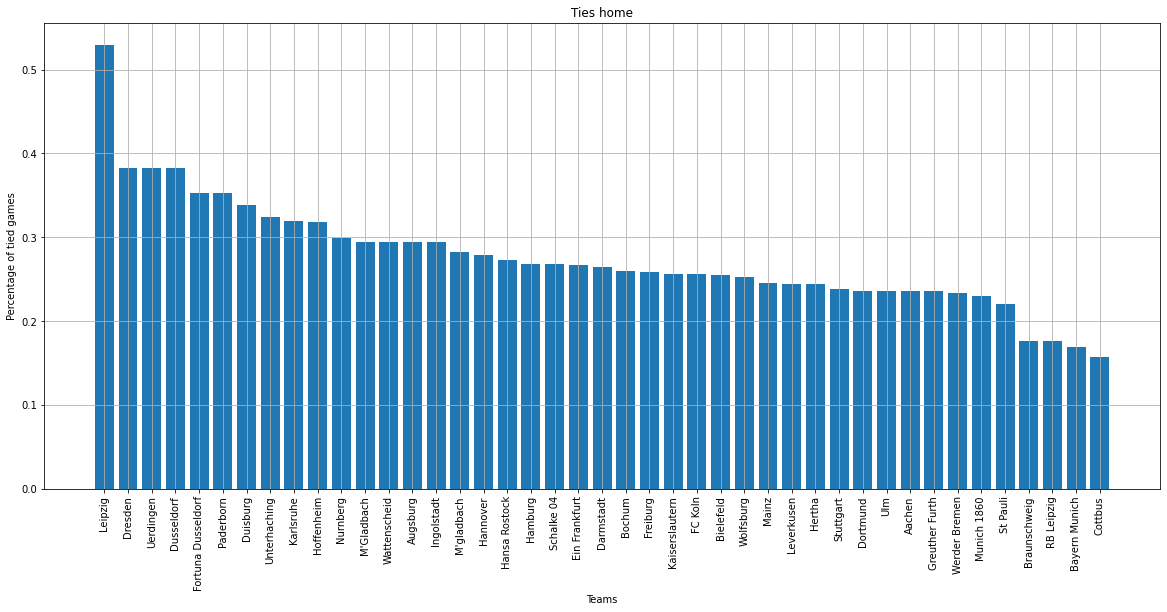

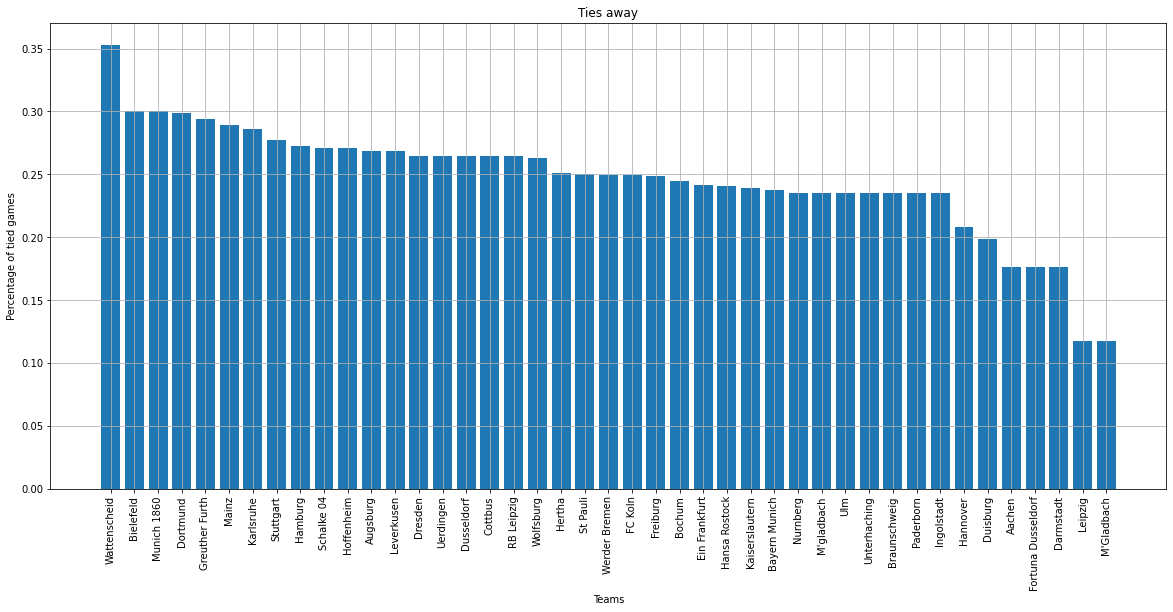

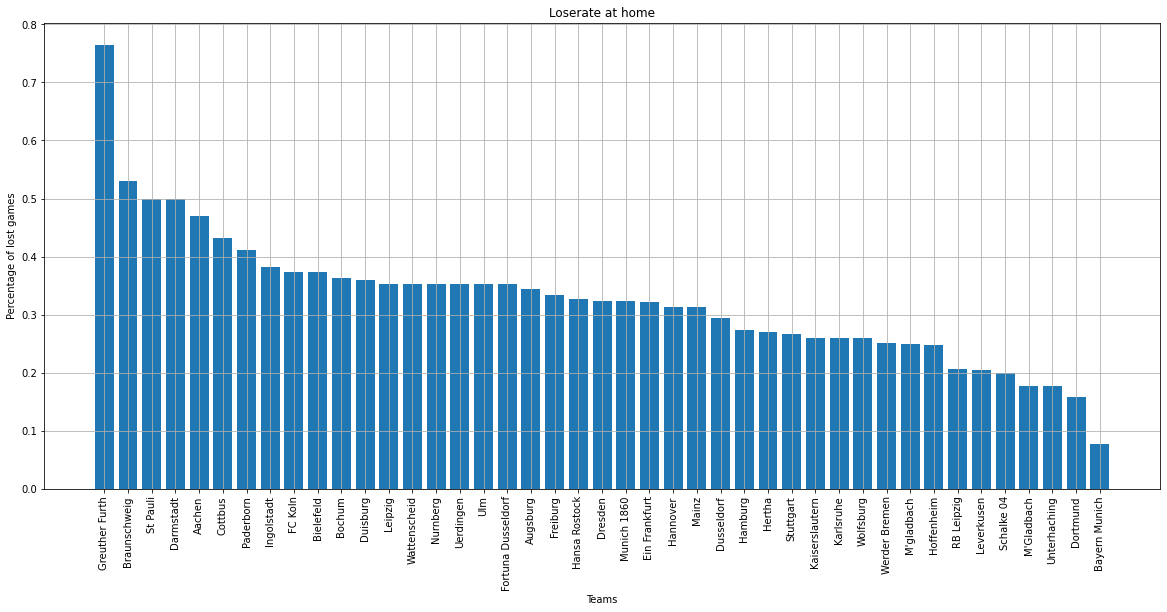

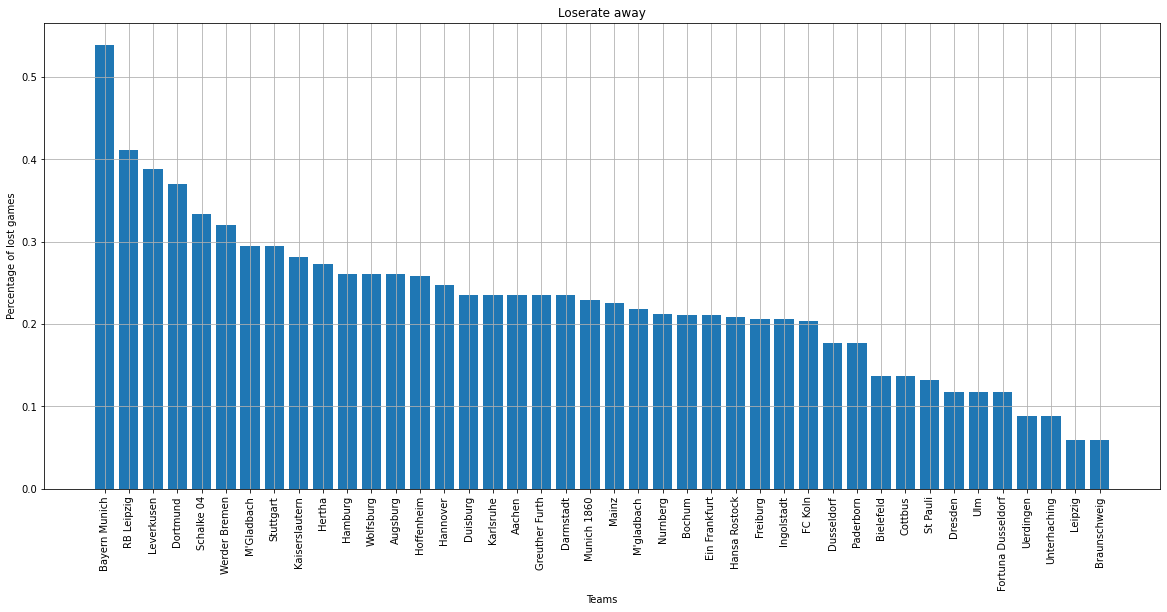

In [53]:
#visualize results for the six categorys
i = 1
for dic in [winrates_home, winrates_away, tie_home, tie_away, loserate_home, loserate_away]:
    dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))
    plt.figure(figsize=(20,60))
    plt.subplot(6, 1, i)
    if i == 1:
        plt.title("Winrate at home")
        plt.ylabel("Percentage of won games")
    elif i == 2:
        plt.title("Winrate away")
        plt.ylabel("Percentage of won games")
    elif i == 3:
        plt.title("Ties home")
        plt.ylabel("Percentage of tied games")
    elif i == 4:
        plt.title("Ties away")
        plt.ylabel("Percentage of tied games")
    elif i == 5:
        plt.title("Loserate at home")
        plt.ylabel("Percentage of lost games")
    elif i == 6:
        plt.title("Loserate away")
        plt.ylabel("Percentage of lost games")
    plt.xlabel("Teams")
    plt.xticks(rotation=90)
    plt.bar(range(len(dic)), list(dic.values()), align='center')
    plt.xticks(range(len(dic)), list(dic.keys()))
    plt.grid()
    i += 1
plt.show()

C:\Users\Janne\AppData\Local\Temp\ipykernel_13740\3993761727.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,8))


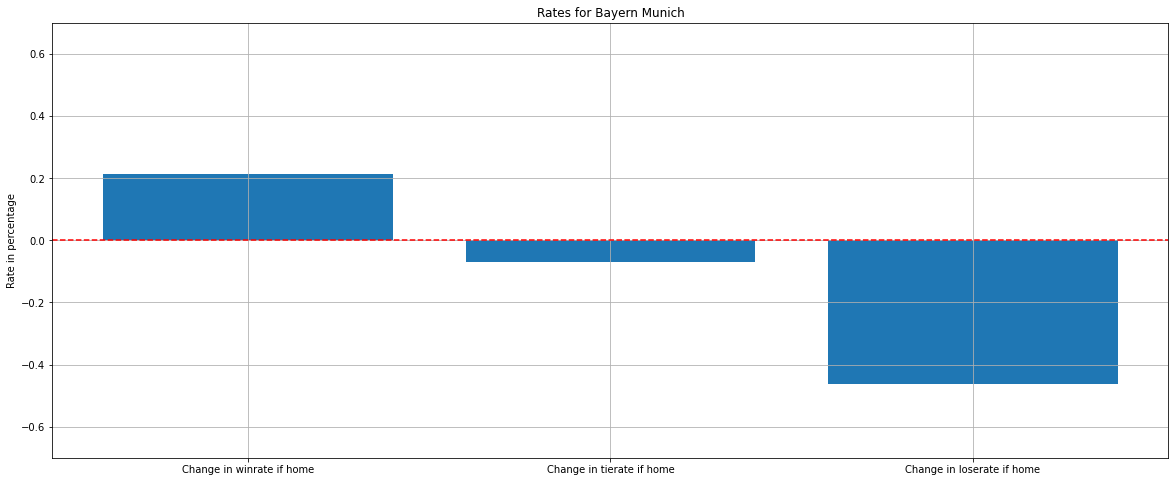

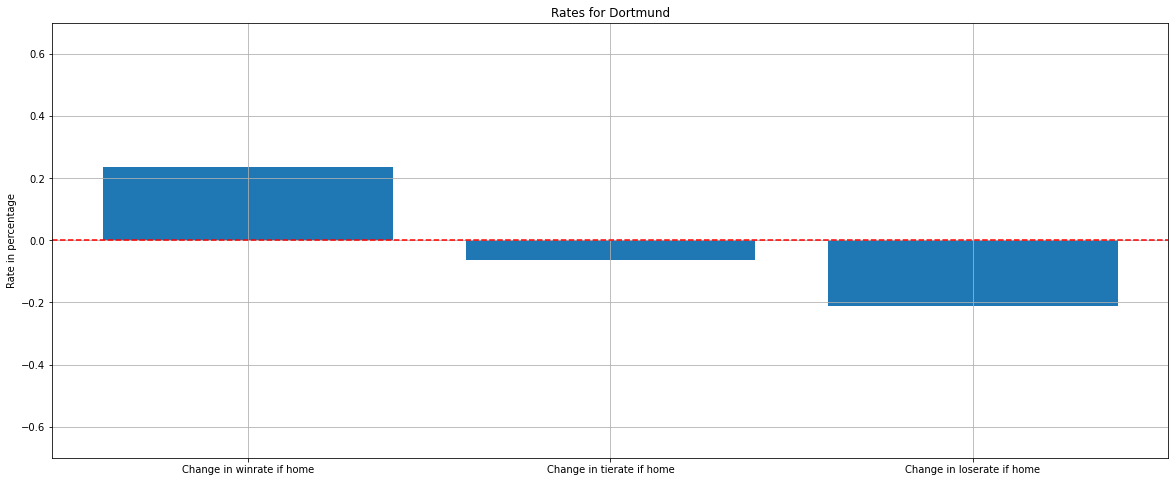

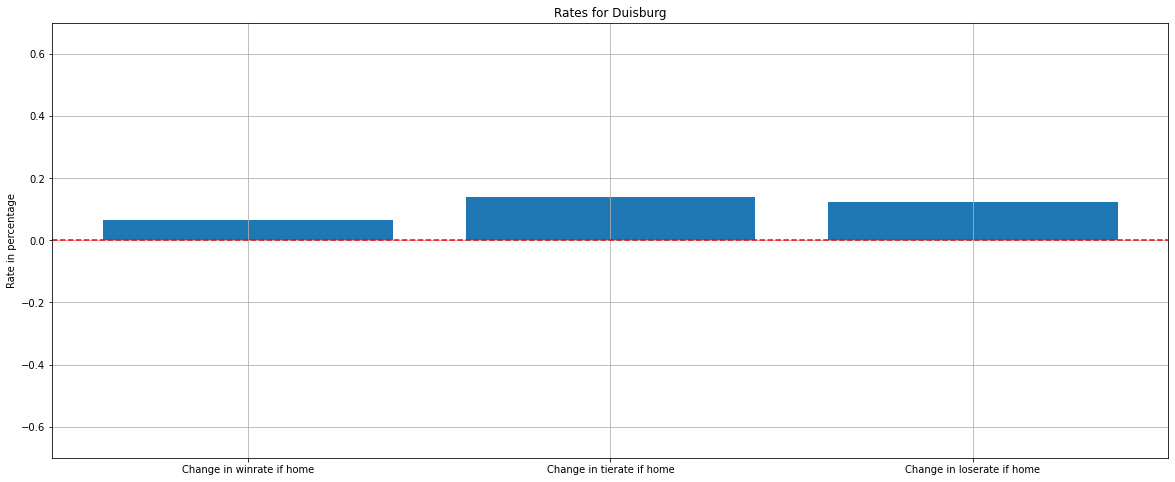

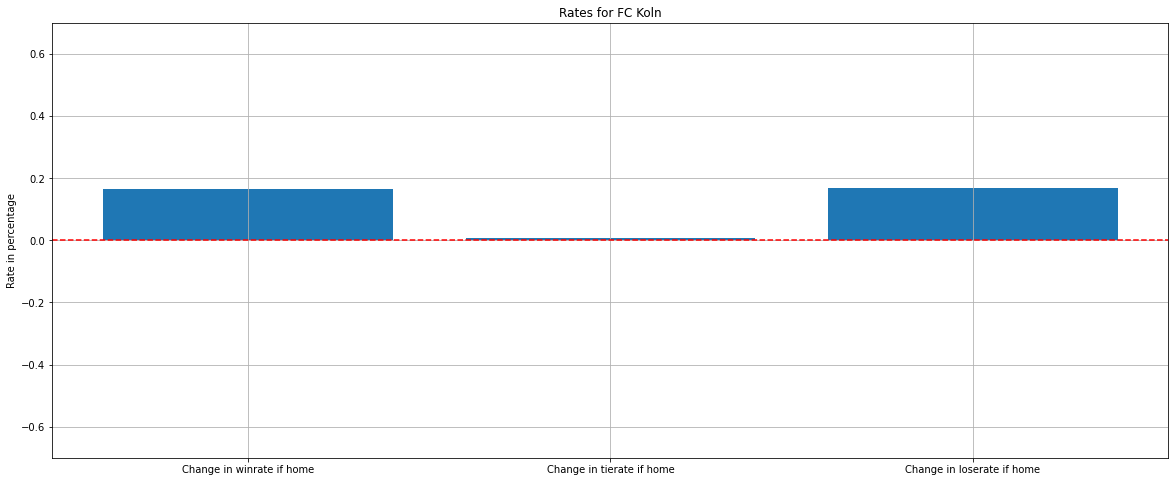

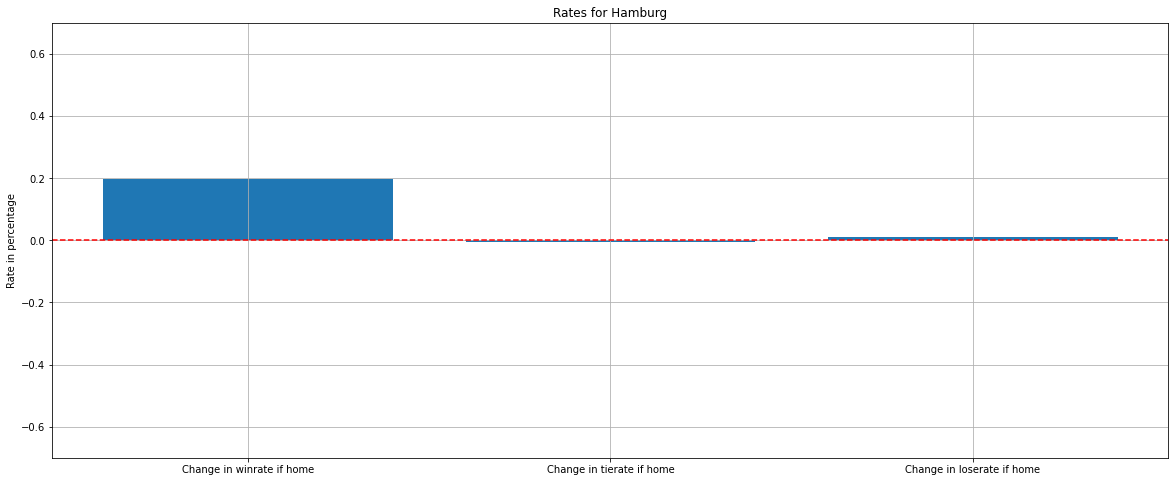

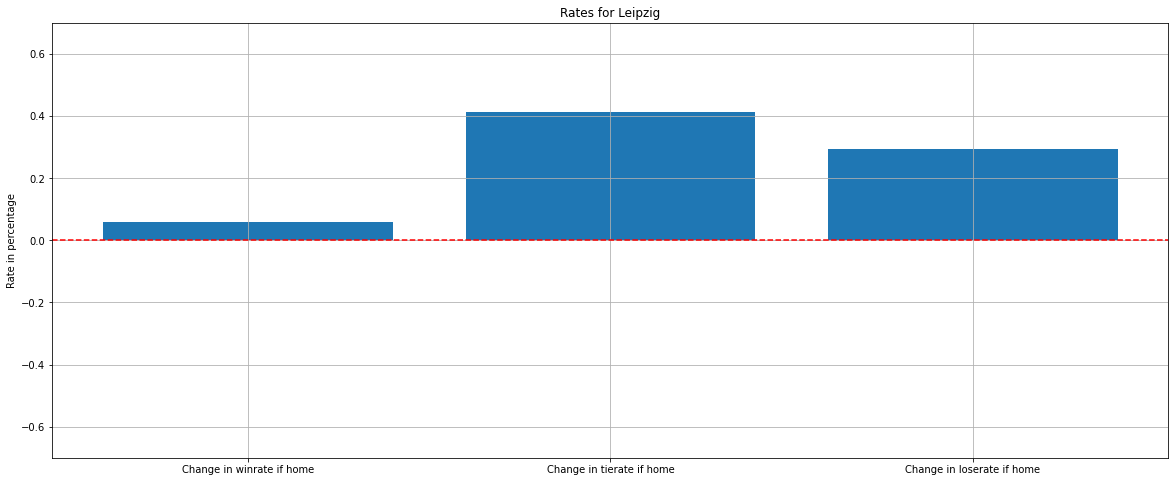

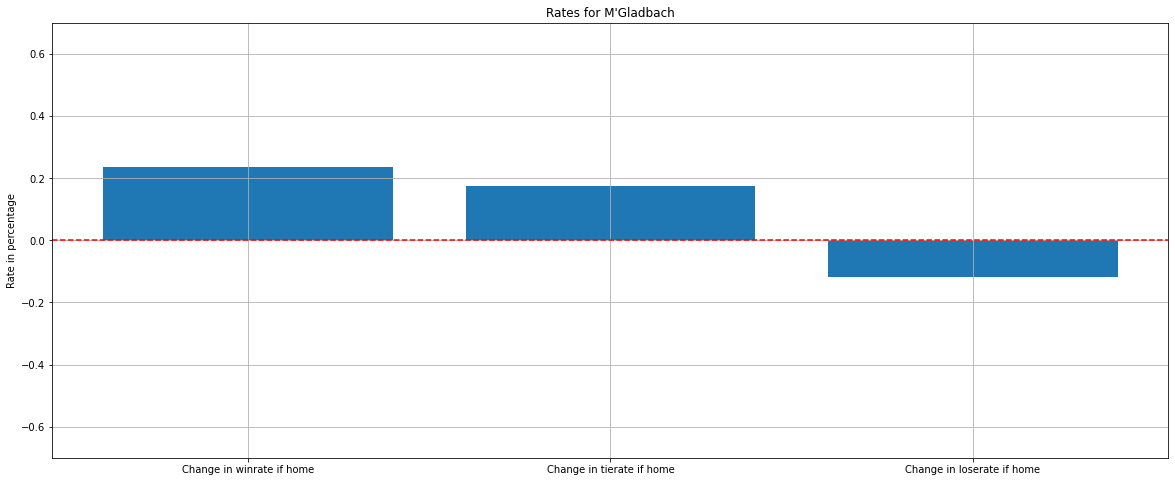

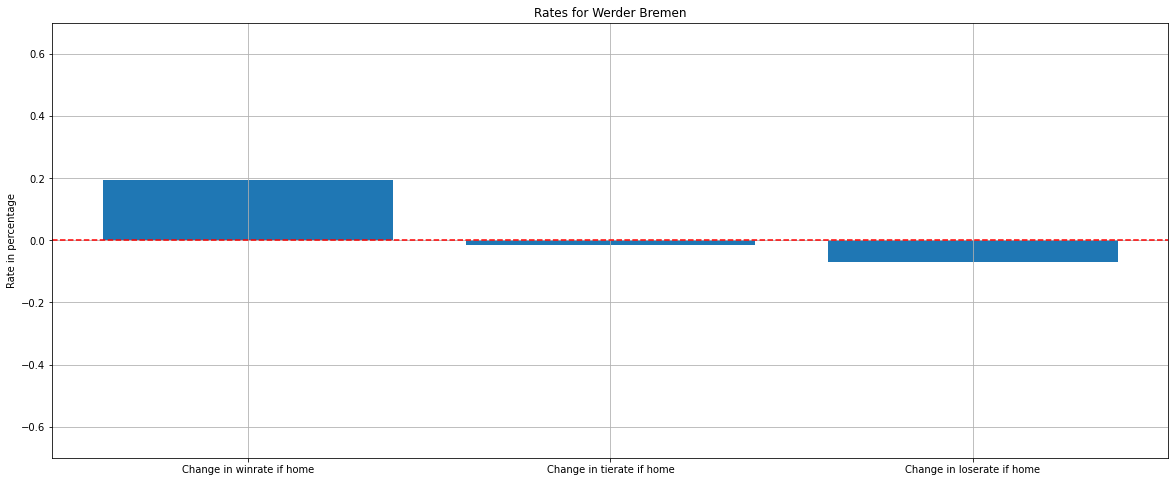

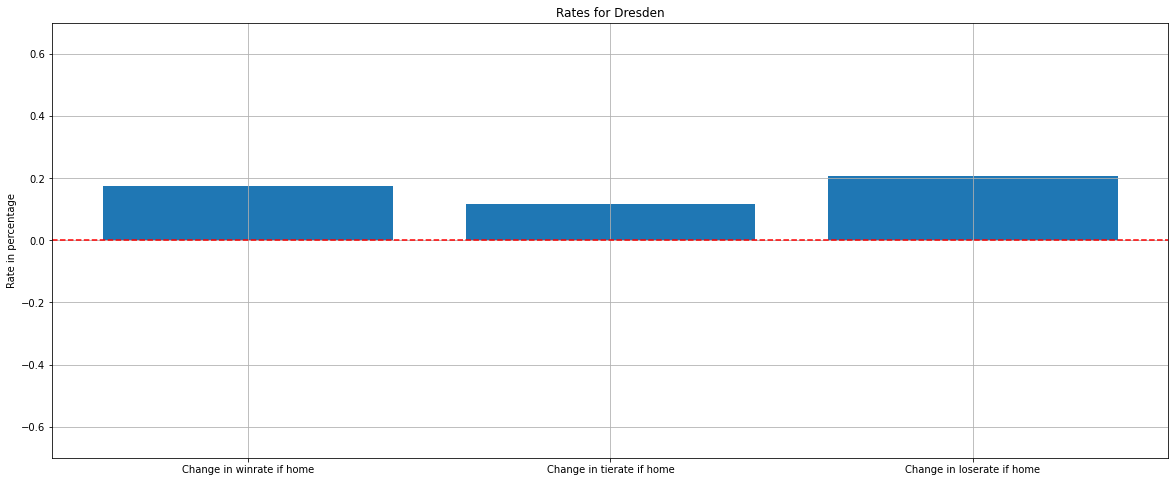

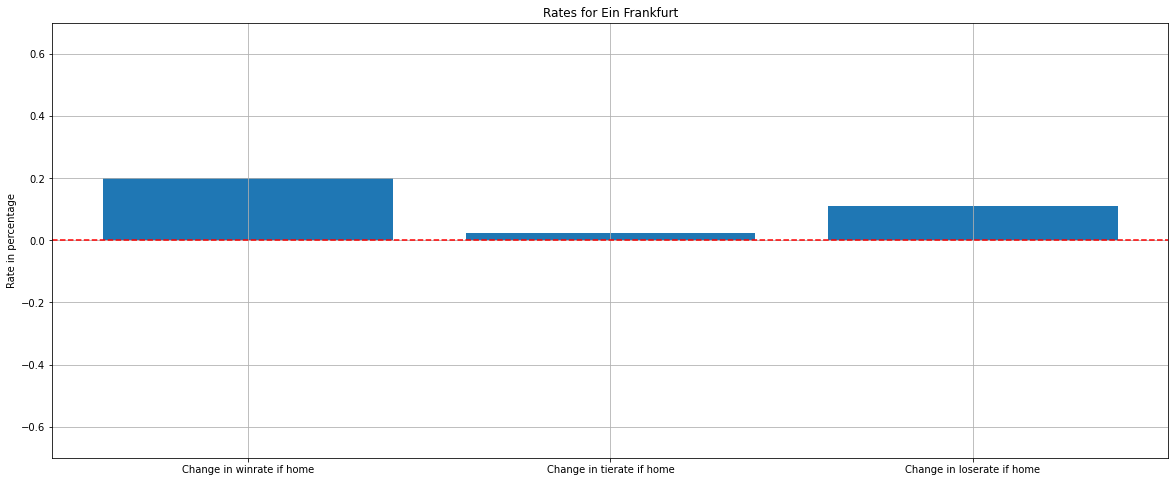

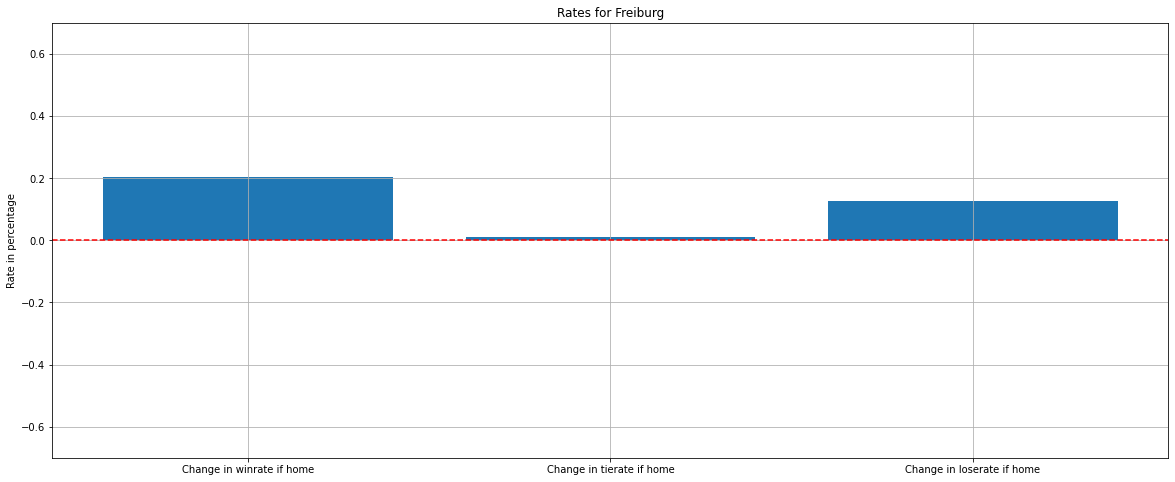

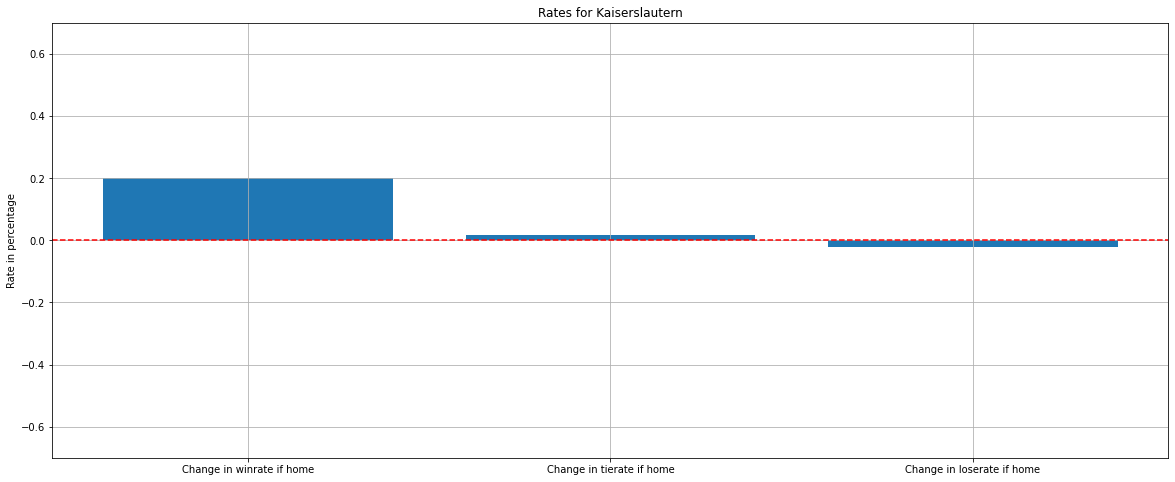

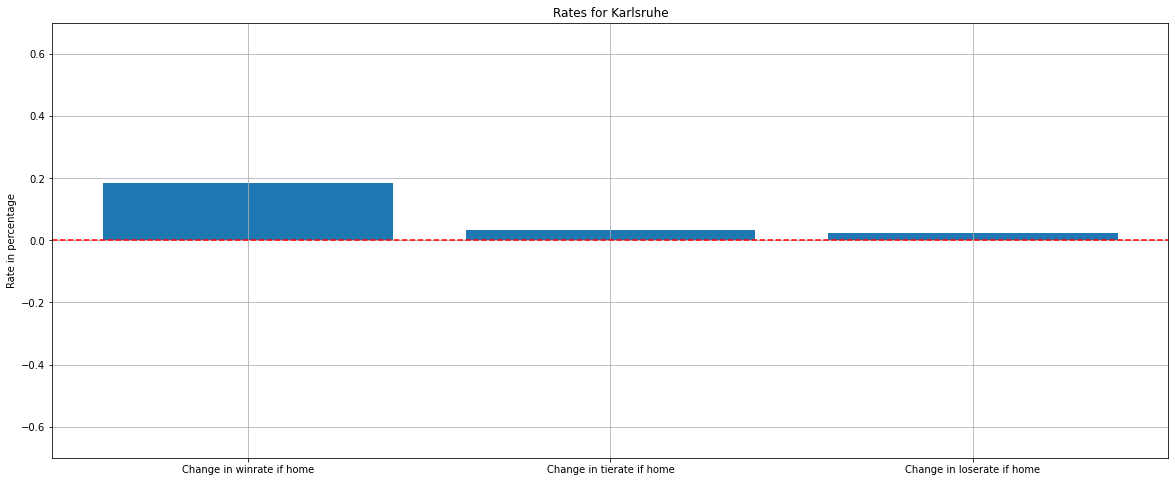

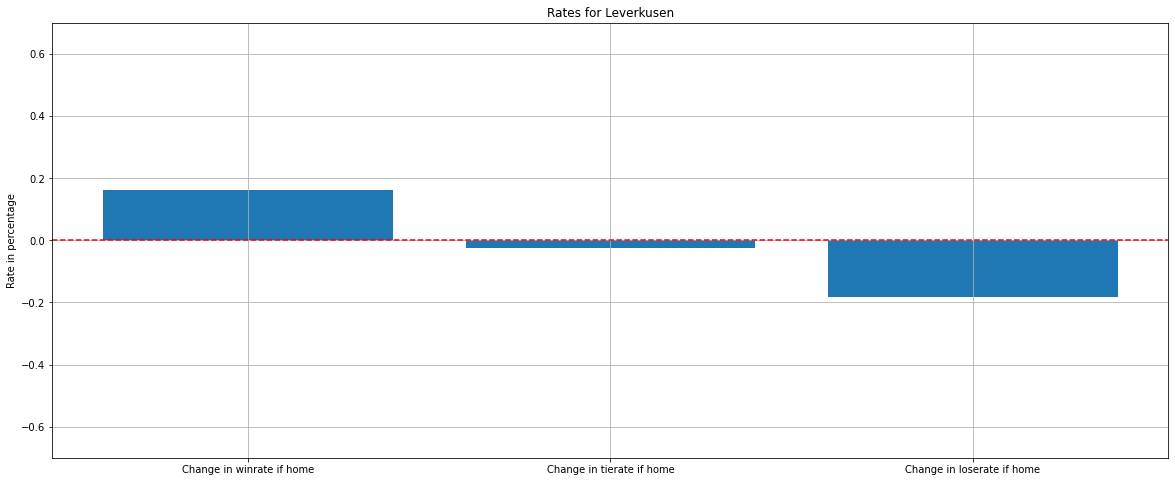

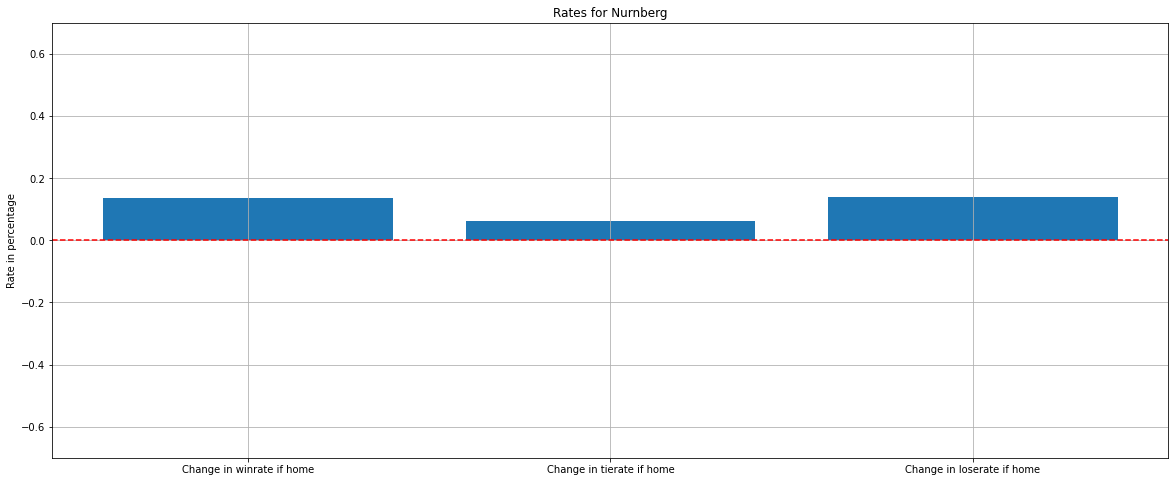

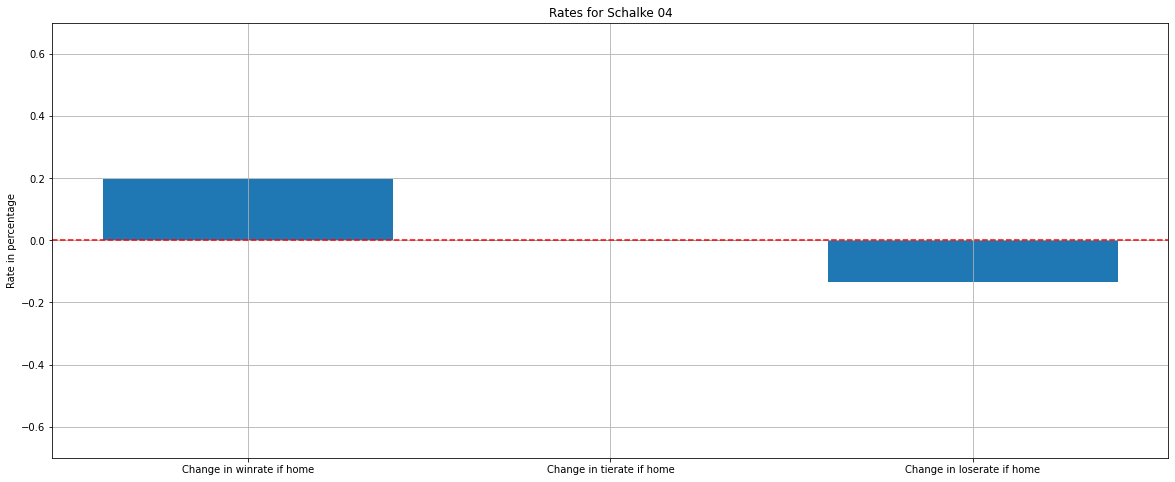

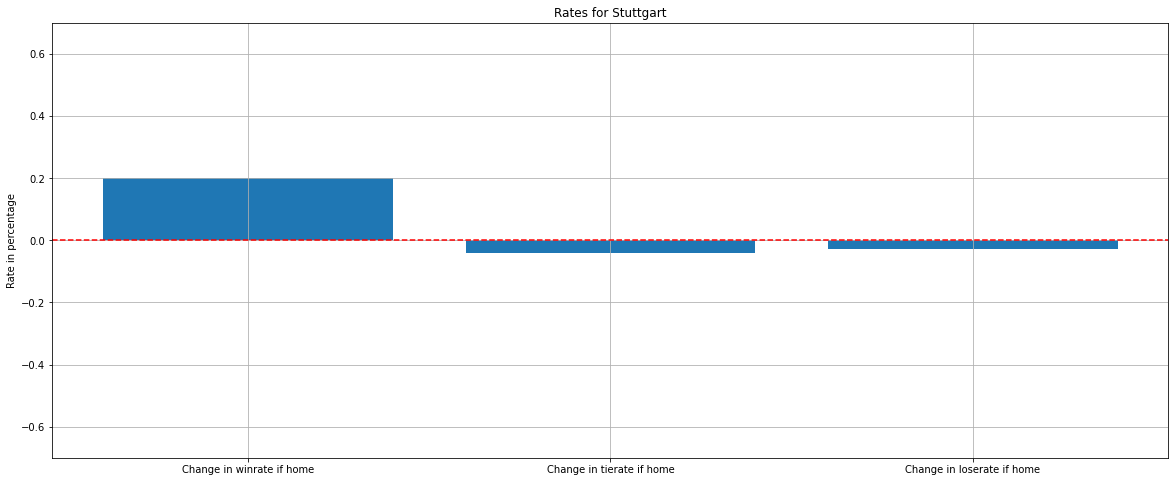

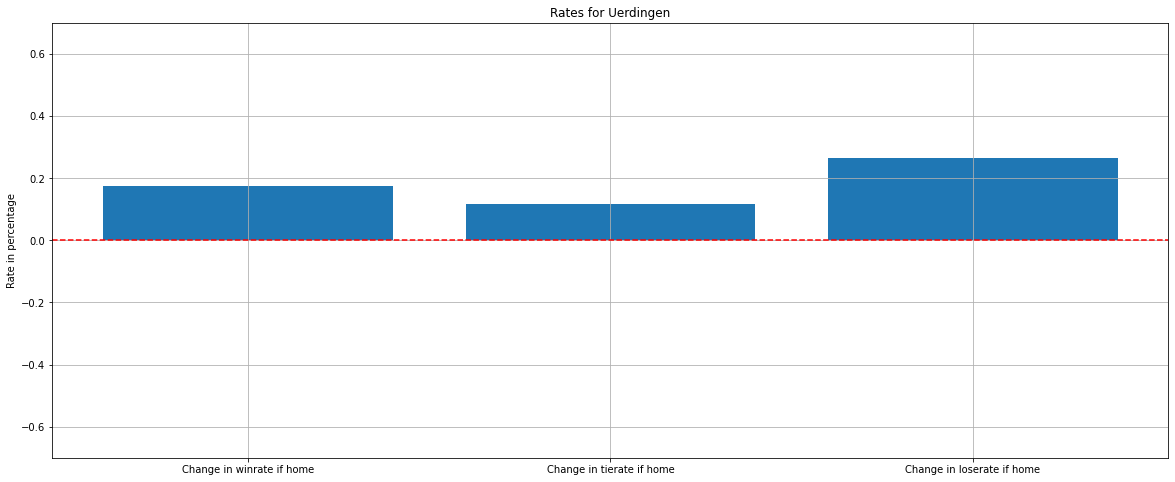

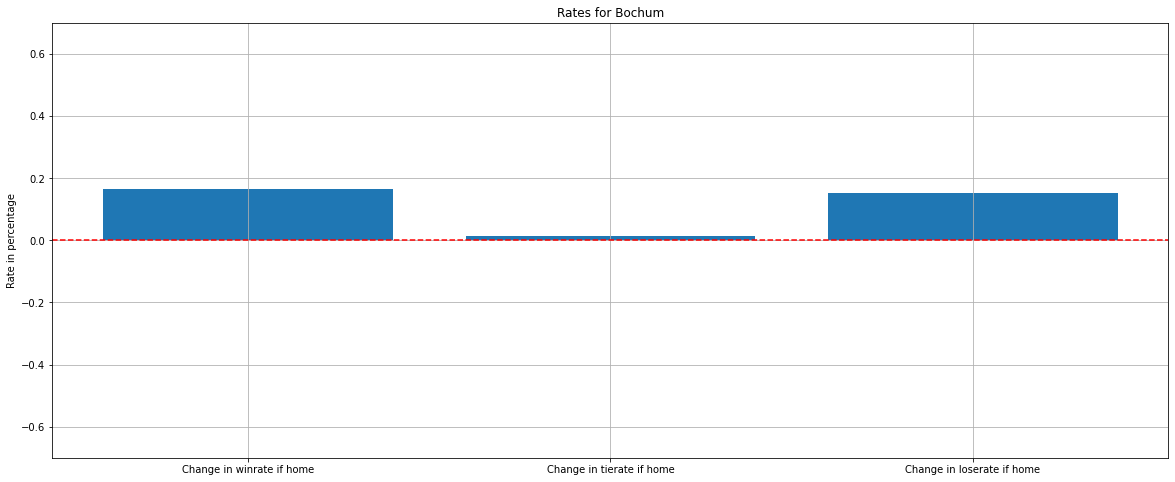

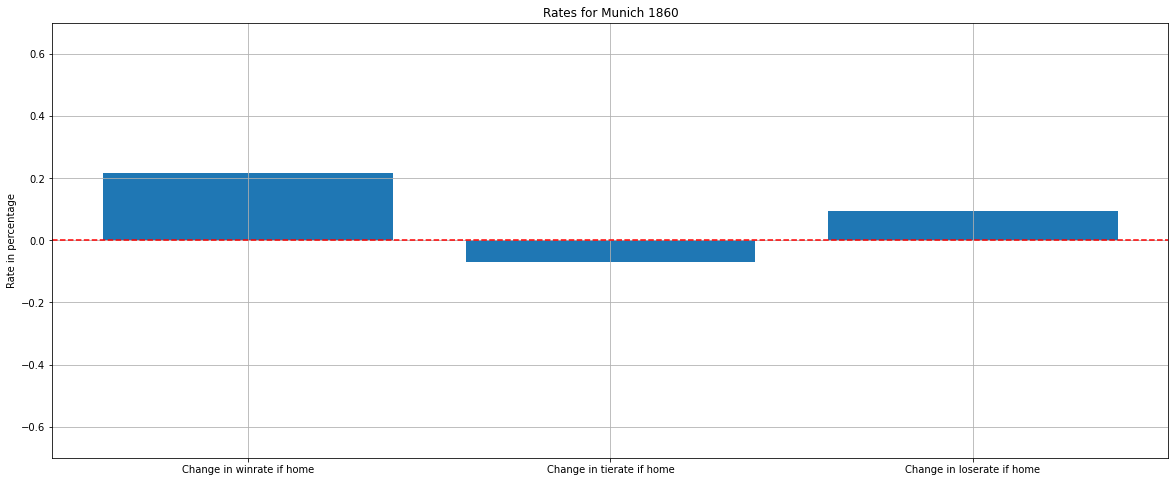

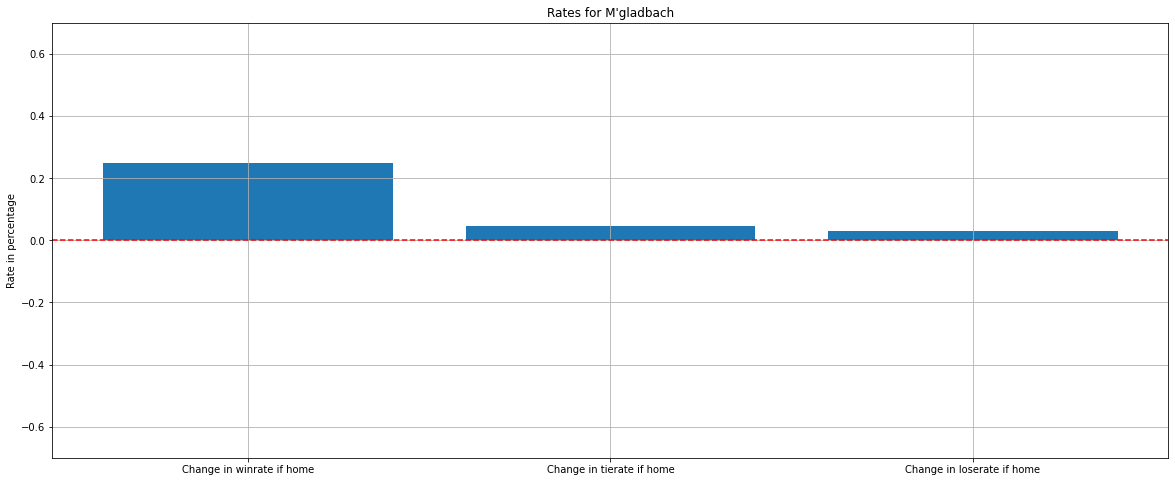

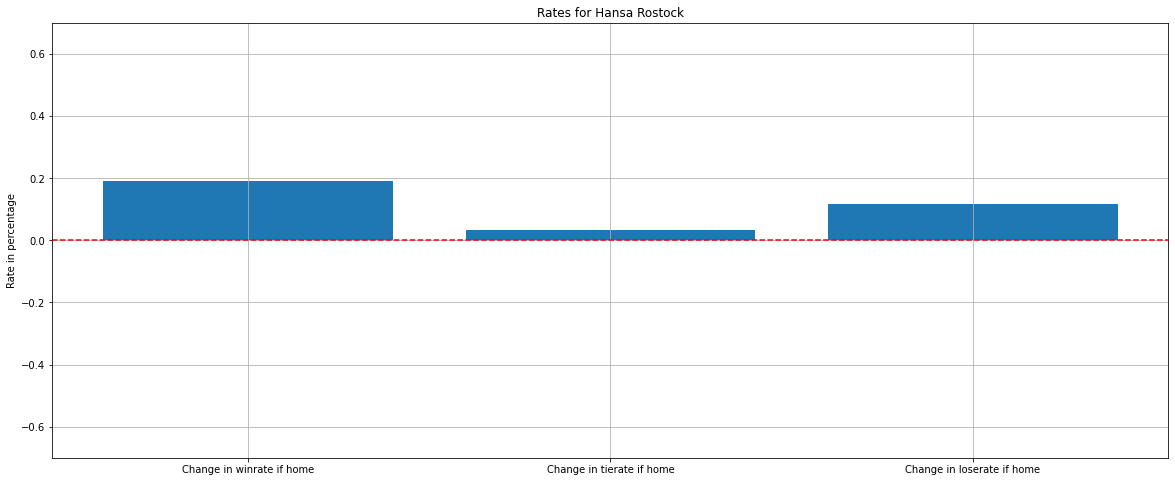

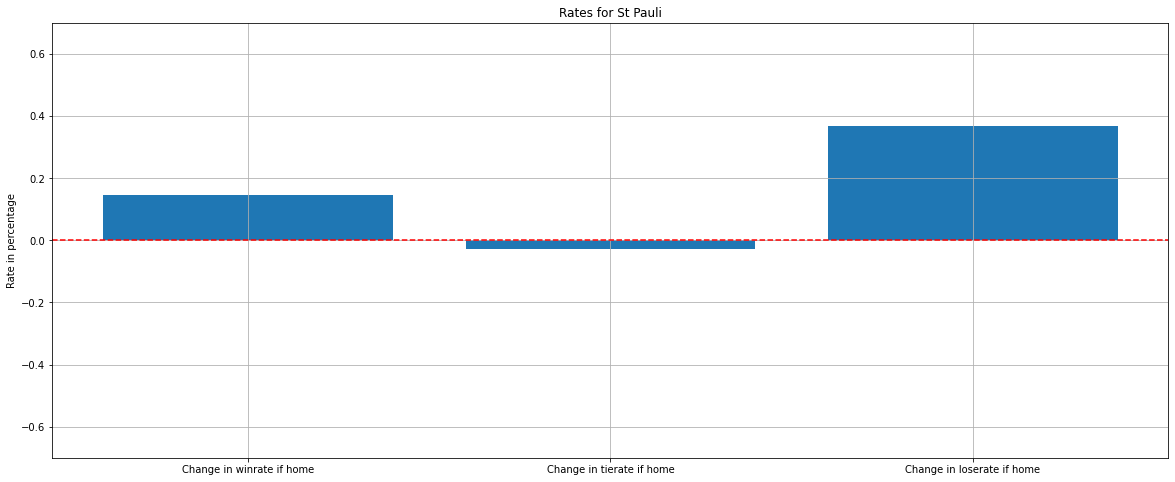

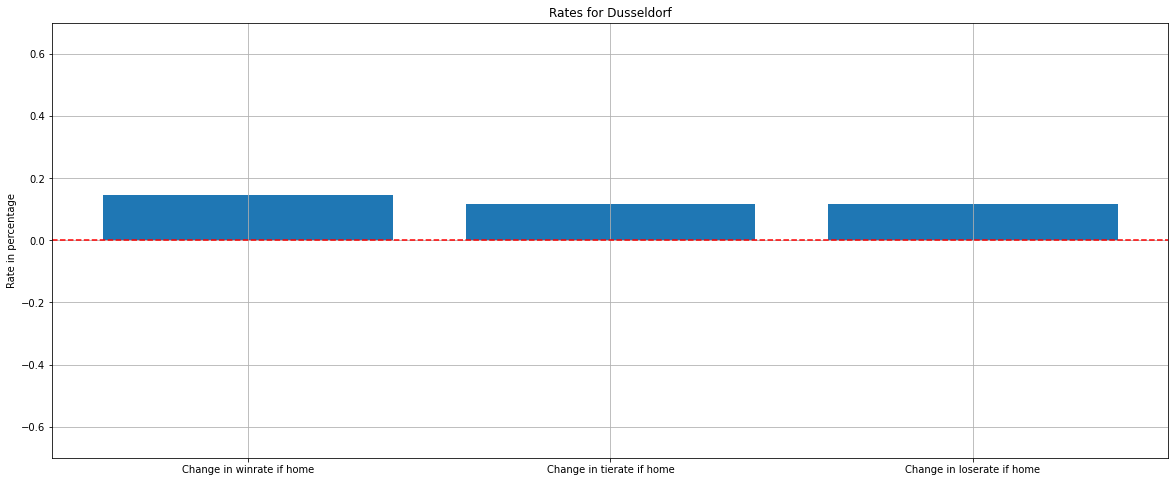

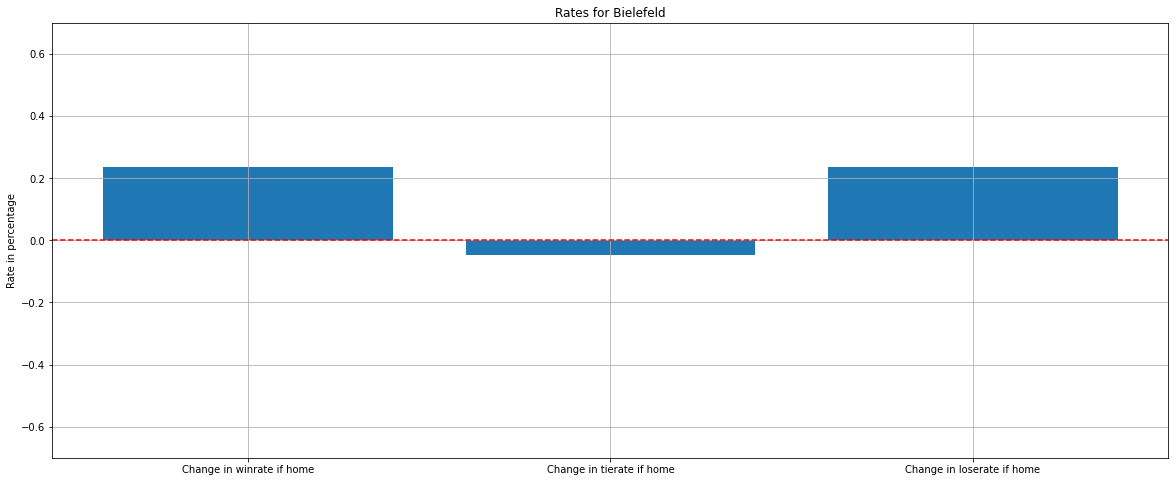

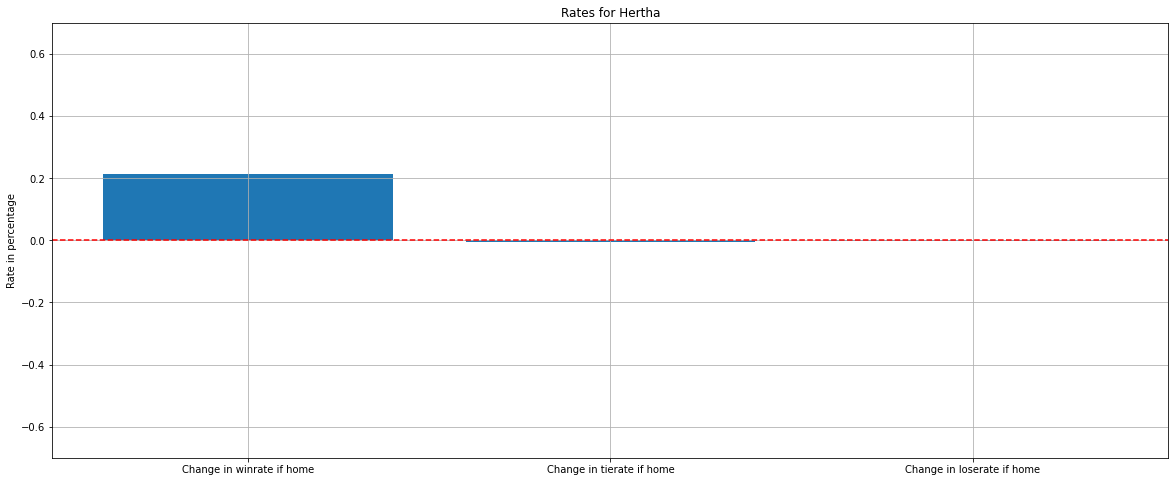

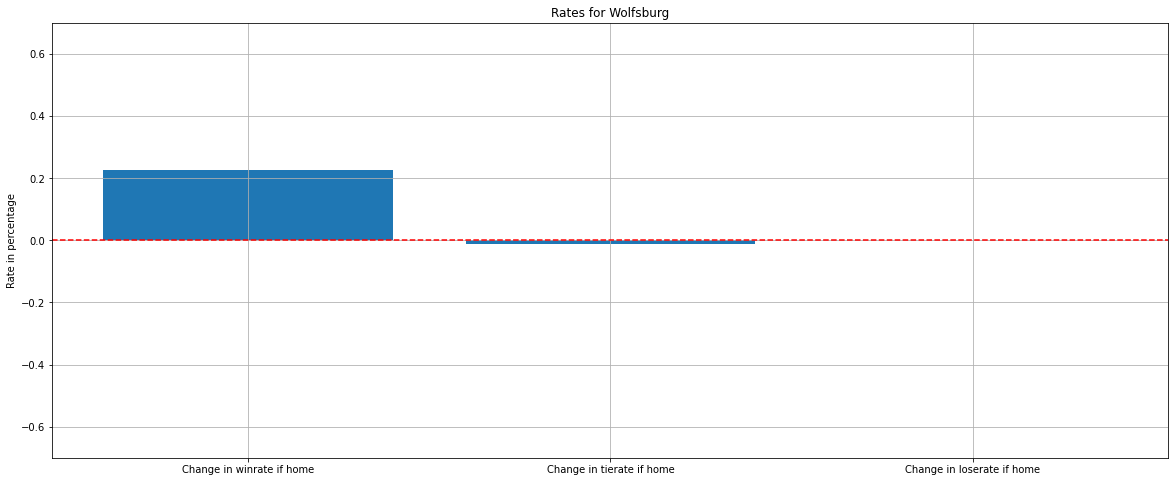

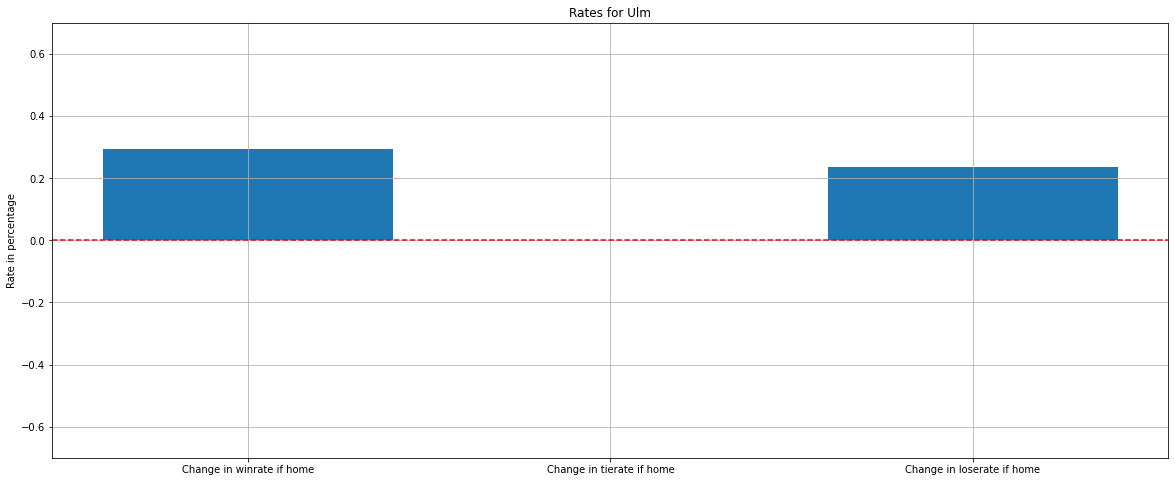

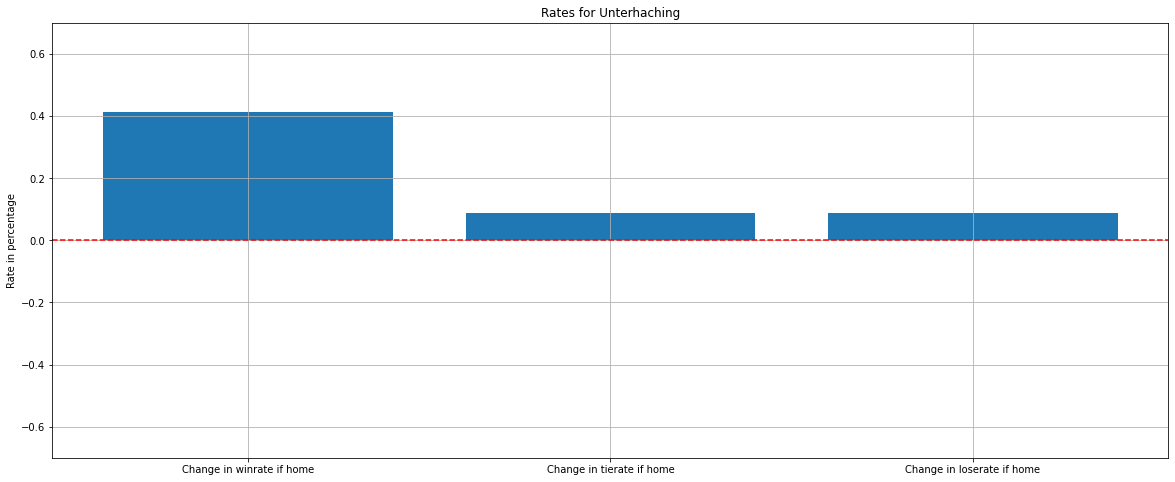

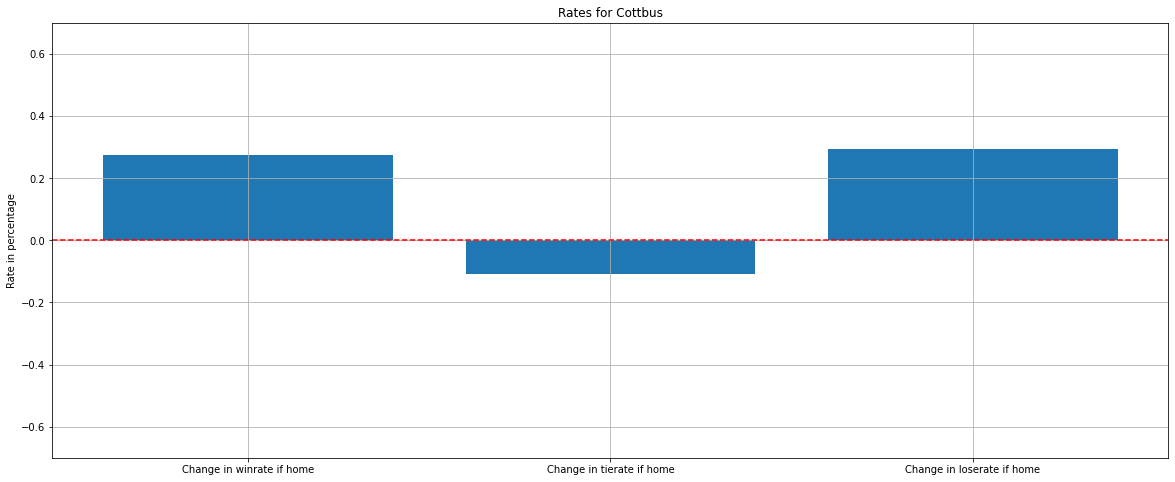

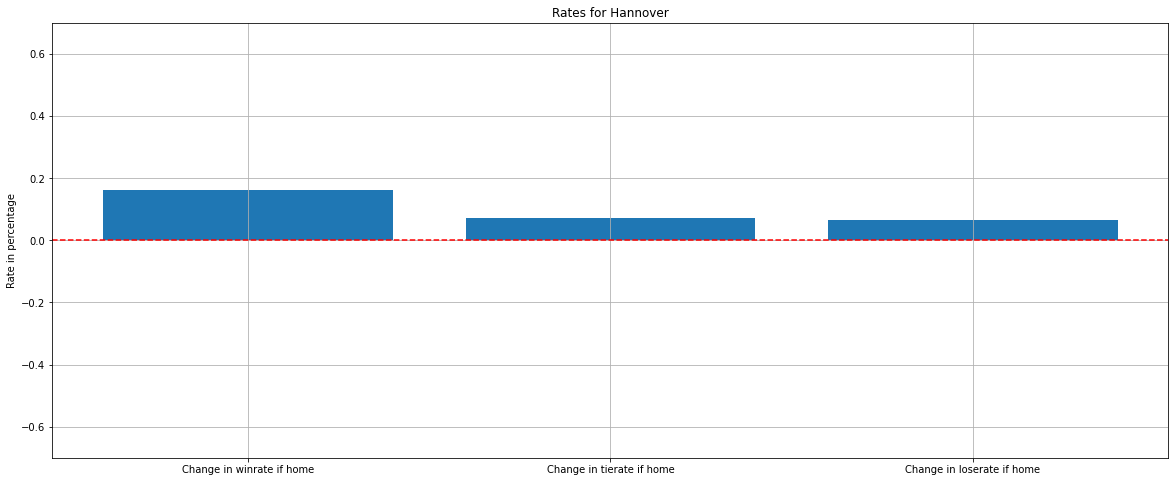

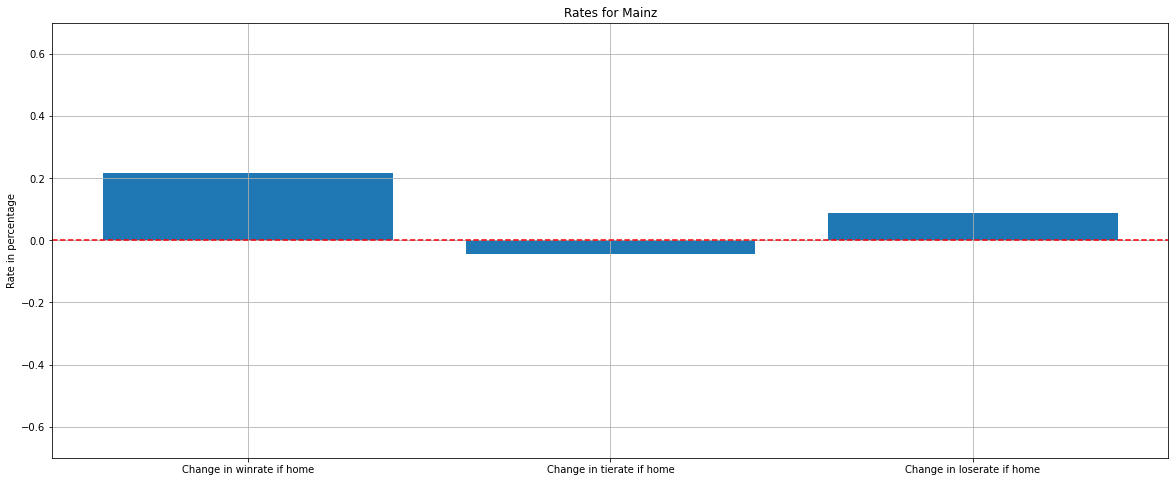

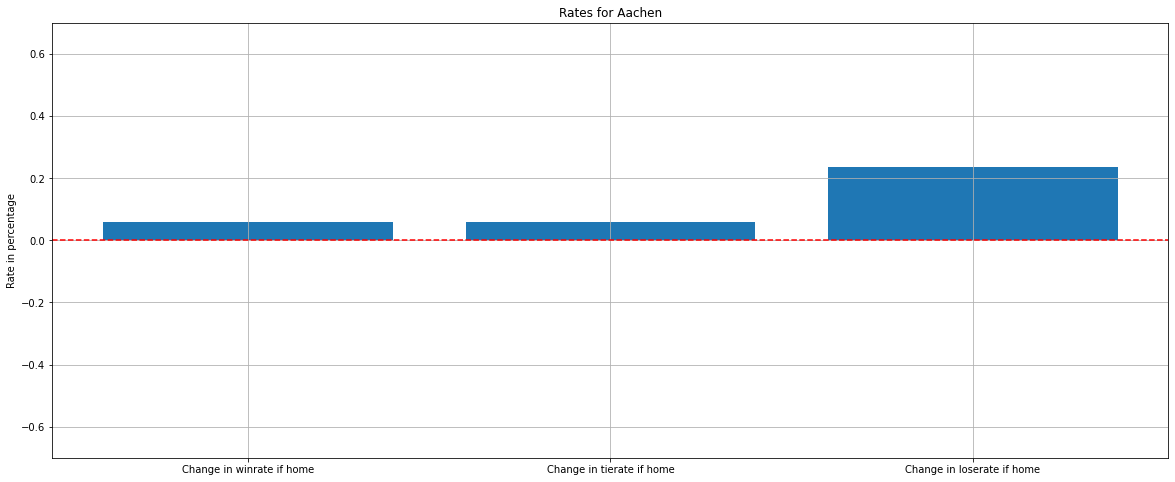

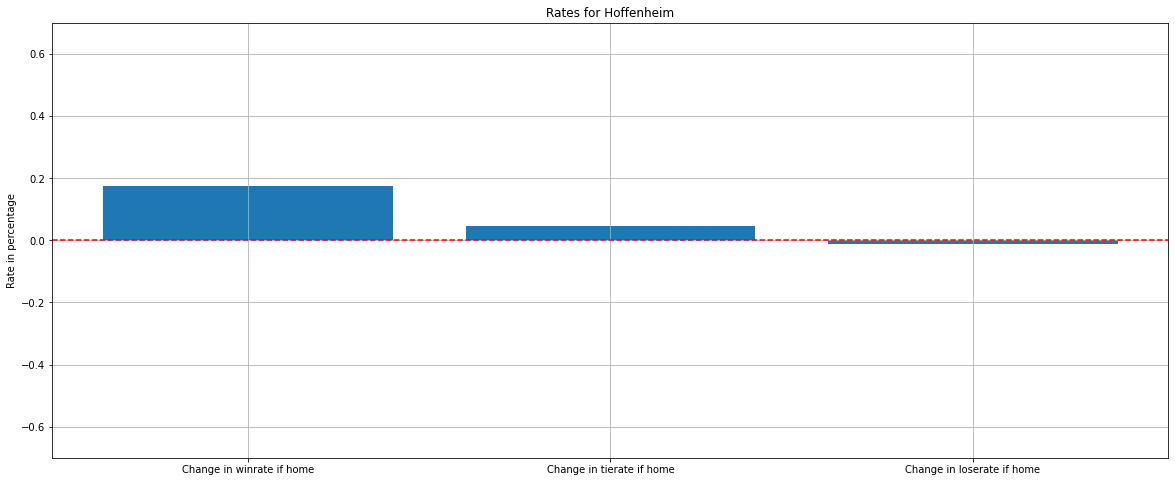

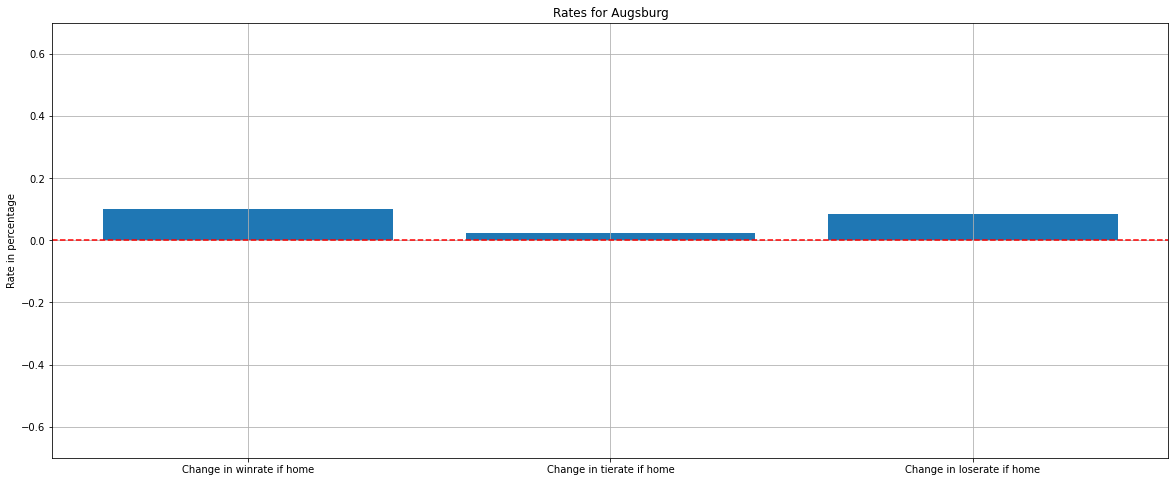

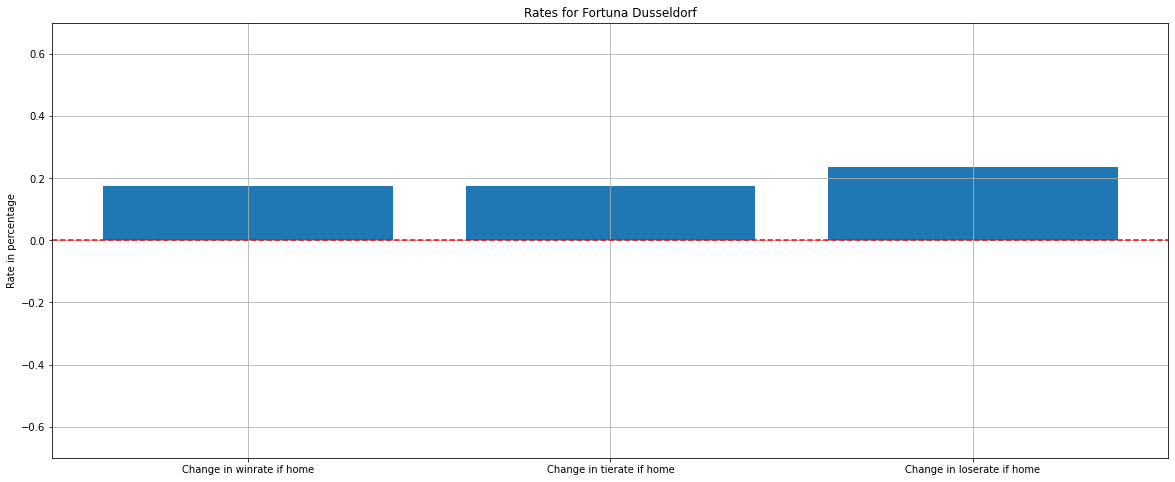

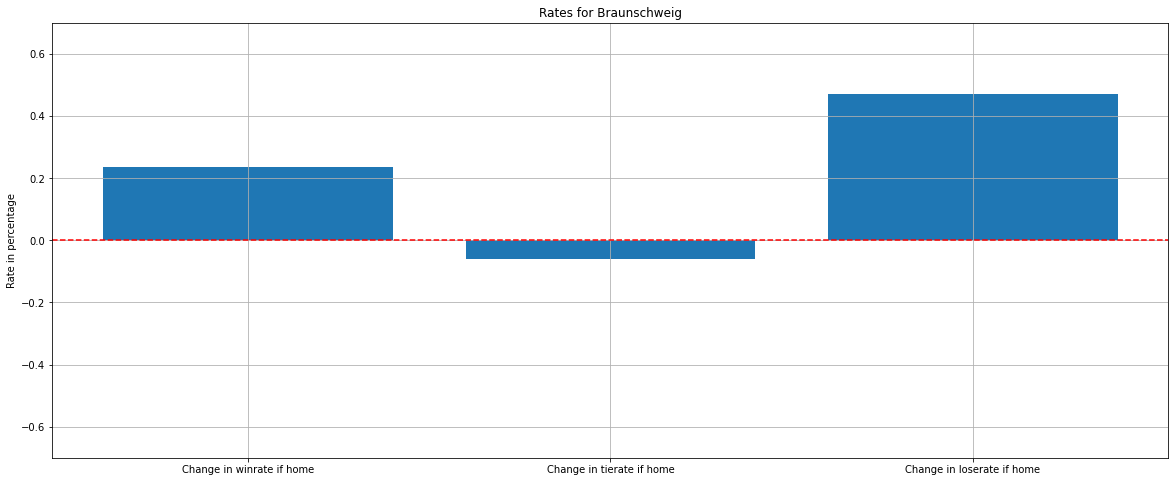

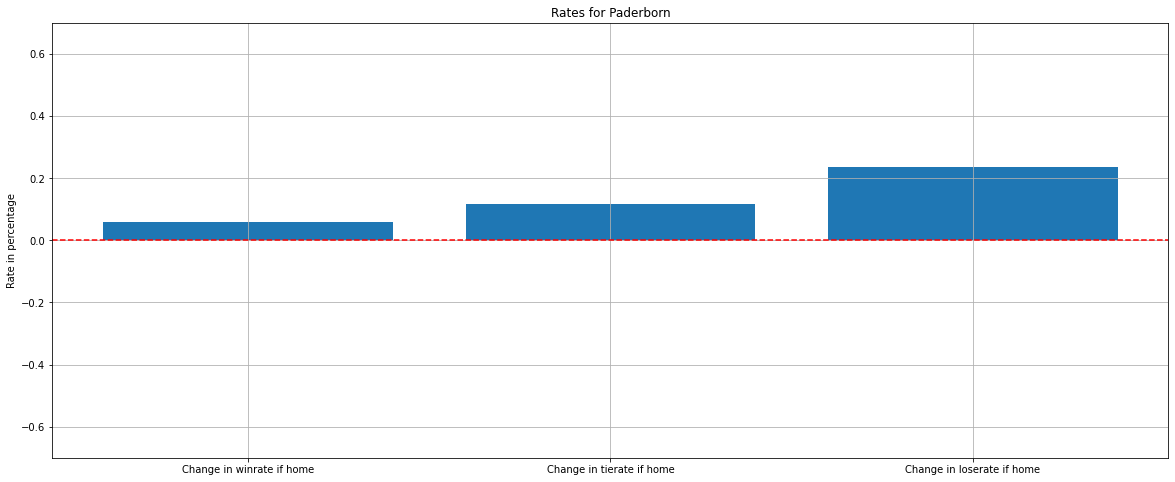

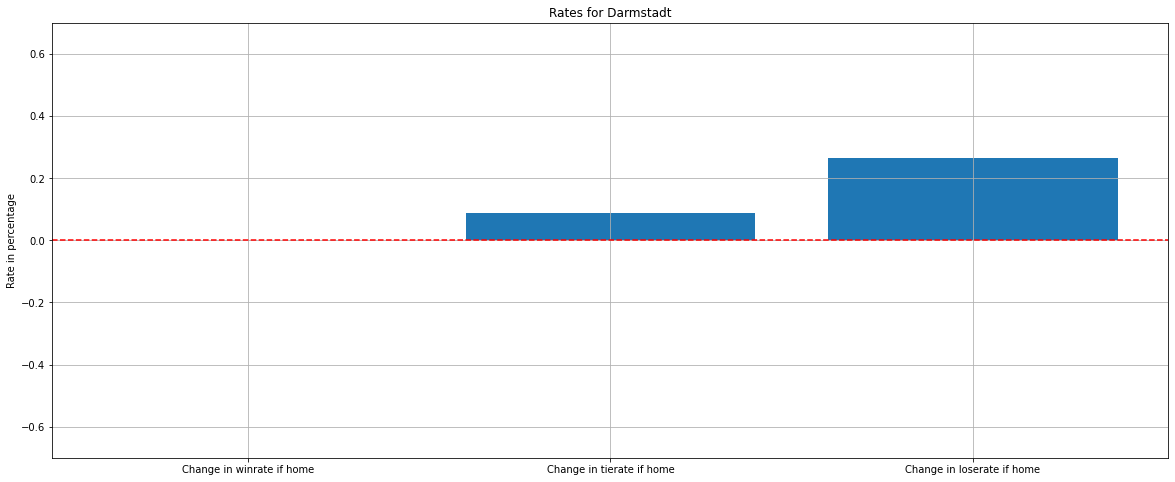

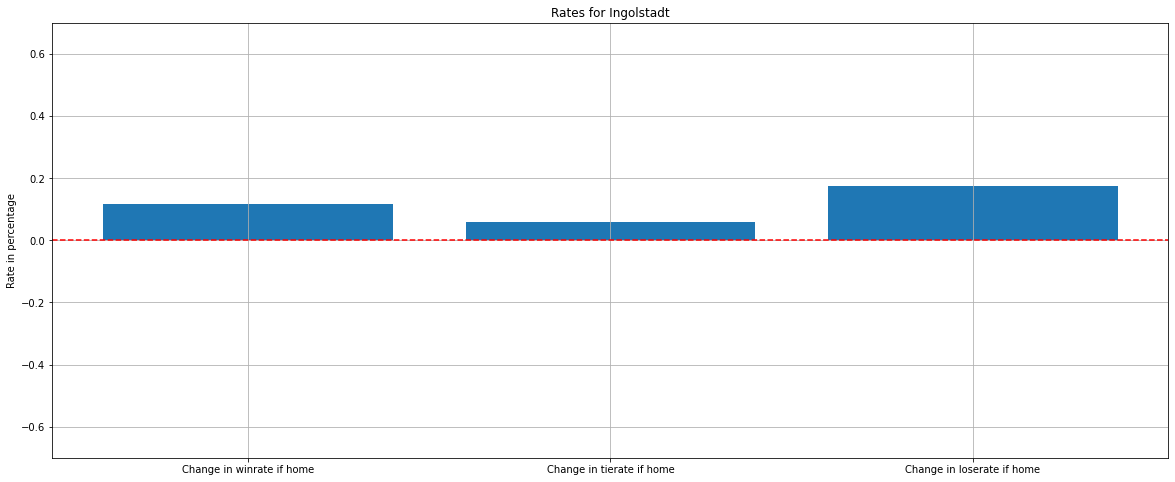

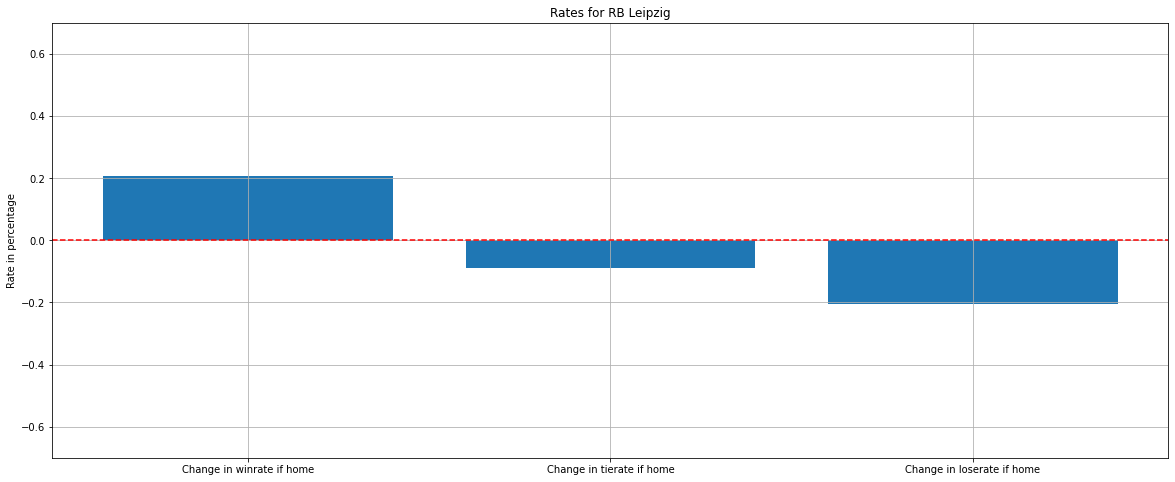

In [64]:
#do a comparrison for each indivdual team
i = 1
for team in df['HomeTeam'].unique():
    try:
        home_list = [winrates_home[team]-winrates_away[team], tie_home[team]-tie_away[team],loserate_home[team]-loserate_away[team]]
        plt.figure(figsize=(20,8))
        plt.title("Rates for %s"%(team))
        plt.bar(range(3), home_list, align='center')
        plt.xticks(range(3), ["Change in winrate if home", "Change in tierate if home", "Change in loserate if home"])
        ax = plt.gca()
        ax.set_ylim([-0.7, 0.7])
        plt.ylabel("Rate in percentage")
        plt.axhline(y=0, color='red', linestyle='--')
        plt.grid()
        i += 1
    except:
        pass
plt.show()
